<a href="https://colab.research.google.com/github/SvetlanaErmakova/Analytics-and-statistics/blob/main/games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Исследуем набор данных о видеоиграх
1. Загружаем данные
2. Убедимся, что верно прочиталось
3. Выясним в каком столбце больше пропущенных значений
4. Удалим строки с пустыми значениями
5. Выведем описательные хар-ки Year
6. Построим график распредлеения кол-ва игр по годам
7. Изменить тип данных переменной Year
8. На каких платформах произошло больше всего релизов (оставить названия платформ, у кт частота встречаемости >= 7%)
9. Указать значения в порядке убывания частоты встречаемости через запятую с пробелами.
10. Игры каких создателей встречаеются чаще всего
11. Посчитать mean std median у Nintendo в регионах NA, EU, JP, Other
12. В каком регионе медиана максимальна
13. Построить Boxplot-ты где по Ох жанр, по Оу объем продаж в Японии
14. По нему сделаем выводы о межквартальном размахе, медианах, выбросах
15. Визуализировать динамику объема мировых продаж по годам игр Nintendo таких жанров : Fighting, Simulation, Platform, Racing, Sports
16. На каком отрезке времени Sports были наиб популярными (наим отрезок, кт включает в себя нессколько крупных пиков)



1. Загружаем данные
2. Убедимся, что верно прочиталось
3. В каком столбце больше пропущенных значений
4. Удалим строки с пустыми значениями








In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import mode

sns.set(rc = {'figure.figsize': (16, 6)}, style = "whitegrid")

games = pd.read_csv('games.csv')
games.head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [112]:
games.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [113]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [114]:
games.shape

(16598, 11)

In [115]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [116]:
games.dropna(inplace = True)
games.shape

(16291, 11)

1. Выведем описательные хар-ки Year
2. Построим график распредлеения кол-ва игр по годам
3. Изменить тип данных переменной Year



In [117]:
games.Year = games.Year.astype('int')
games.Year.to_frame(100)

,100
0,2006
1,1985
2,2008
3,2009
4,1996
...,...
16593,2002
16594,2003
16595,2008
16596,2010


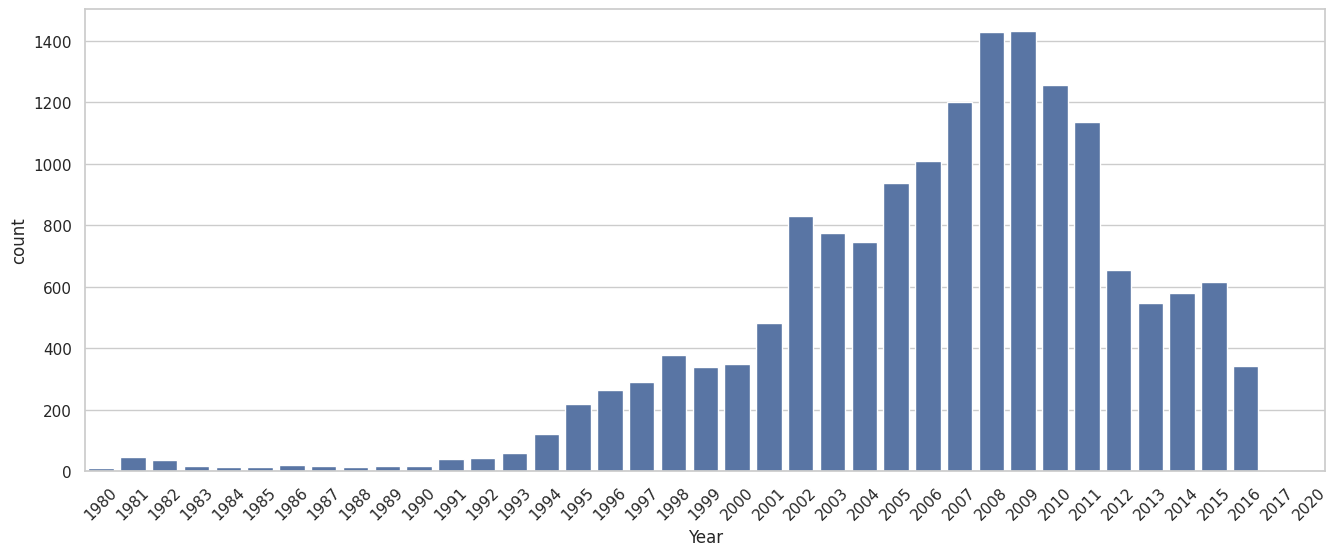

In [118]:
sns.countplot(x = games.Year);
plt.xticks( rotation = 45);

In [119]:
games.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [120]:
games.query("Year <= 2007").shape[0]/16291, games.query("Year > 2007").shape[0]/16291

(0.5093609968694371, 0.4906390031305629)

In [121]:
mode(games.Year)

ModeResult(mode=2009, count=1431)

In [122]:
games.Year.value_counts().reset_index().head()

,Year,count
0,2009,1431
1,2008,1428
2,2010,1257
3,2007,1201
4,2011,1136



1.   На каких платформах произошло больше всего релизов (оставить названия платформ, у кт частота встречаемости >= 7%)
2.   Указать значения в порядке убывания частоты встречаемости через запятую с пробелами



In [123]:
platforms = games.Platform.value_counts( normalize = True).mul(100).to_frame('pct')
platforms

,pct
Platform,
DS,13.080842
PS2,13.056289
PS3,8.004420
Wii,7.918483
X360,7.574735
PSP,7.347615
PS,7.298508
PC,5.757780
XB,4.929102


In [124]:
platforms.query(" pct > 7 ").index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']


1.  Игры каких создателей встречаеются чаще всего



In [125]:
games.Publisher.value_counts().head(10)

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: count, dtype: int64

In [126]:
#mode(games.Publisher)
games.Publisher.describe()

count               16291
unique                576
top       Electronic Arts
freq                 1339
Name: Publisher, dtype: object


1.   Посчитать mean std median у Nintendo в регионах NA, EU, JP, Other
2.   В каком регионе медиана максимальна




In [127]:
games.query("Publisher == 'Nintendo'")[[ 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,696.000000,696.000000,696.000000,696.000000
mean,1.172055,0.601006,0.653721,0.136767
std,2.989913,1.743953,1.063110,0.464170
min,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.007500,0.090000,0.000000
50%,0.375000,0.120000,0.280000,0.030000
75%,0.972500,0.482500,0.740000,0.090000
max,41.490000,29.020000,10.220000,8.460000


In [128]:
games.query("Publisher == 'Nintendo'")[[ 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].agg(['median', 'std', 'mean'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
median,0.375000,0.120000,0.280000,0.030000
std,2.989913,1.743953,1.063110,0.464170
mean,1.172055,0.601006,0.653721,0.136767



1.  Построить Boxplot-ты где по Ох жанр, по Оу объем продаж в Японии
2.   По нему сделаем выводы о межквартальном размахе, медианах, выбросах



<Axes: xlabel='Genre', ylabel='JP_Sales'>

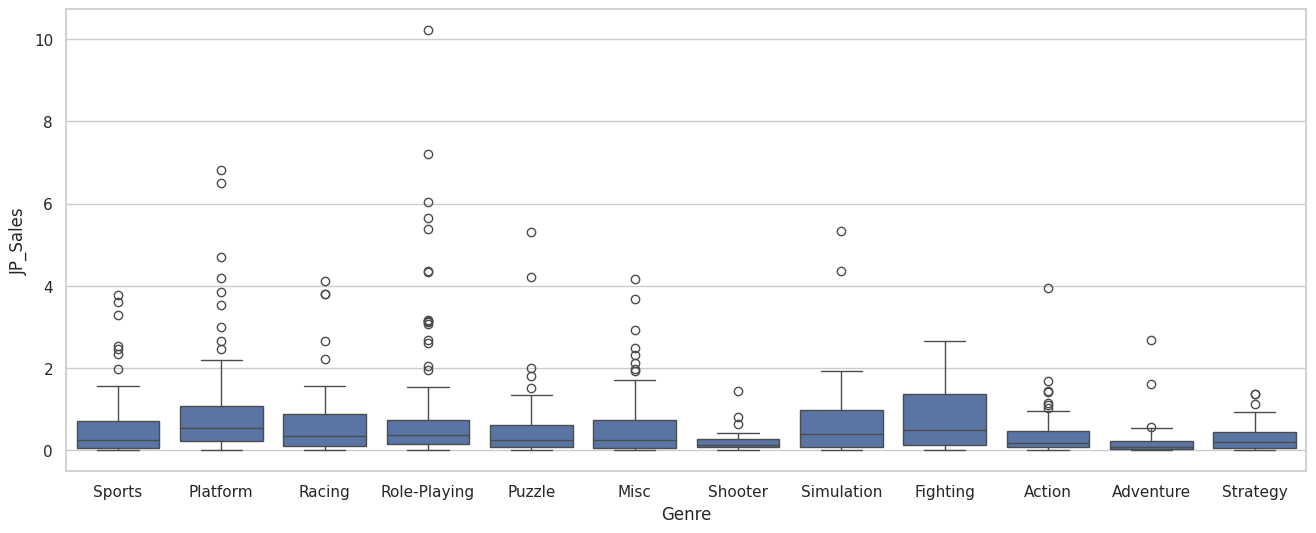

In [129]:
sns.boxplot(data = games.query("Publisher == 'Nintendo' "), x = 'Genre' , y = 'JP_Sales')

<Axes: xlabel='Genre', ylabel='JP_Sales'>

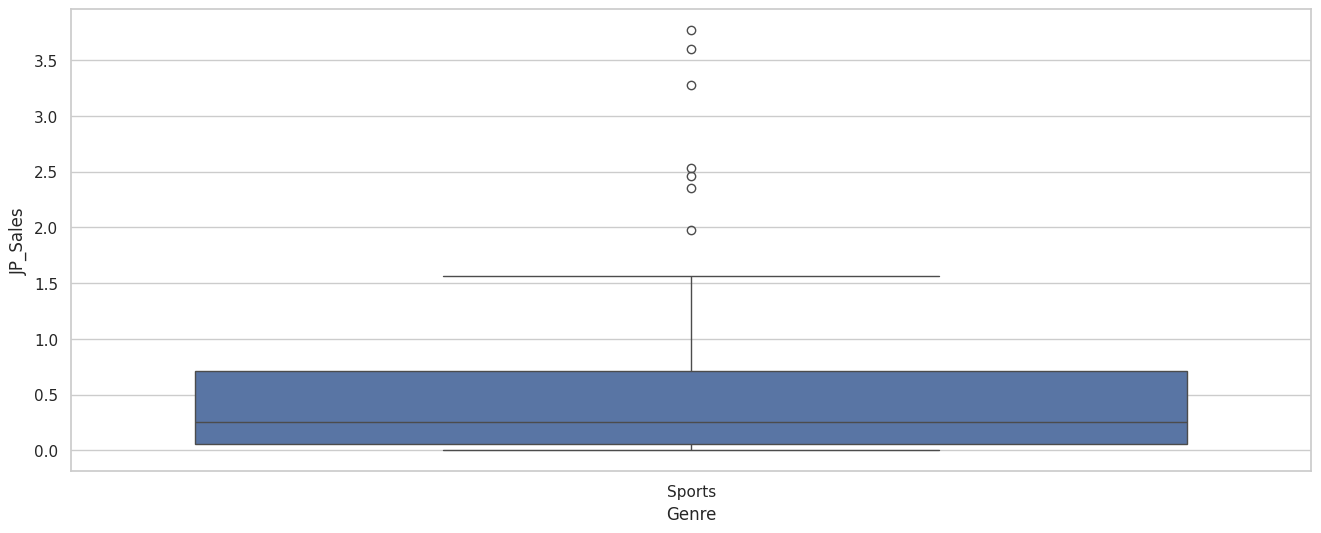

In [130]:
sns.boxplot(data = games.query("Publisher == 'Nintendo' and Genre == 'Sports'"), x = 'Genre' , y = 'JP_Sales')


1.  Визуализировать динамику объема мировых продаж по годам игр Nintendo таких жанров : Fighting, Simulation, Platform, Racing, Sports
2.  На каком отрезке времени Sports были наиб популярными (наим отрезок, кт включает в себя нессколько крупных пиков)



In [131]:
df = games.query("Publisher == 'Nintendo'").query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")
df = df.groupby(['Genre', 'Year']).Global_Sales.sum().reset_index()
df

,Genre,Year,Global_Sales
0,Fighting,1987,5.42
1,Fighting,1993,2.00
2,Fighting,1995,3.20
3,Fighting,1996,0.99
4,Fighting,1999,5.55
...,...,...,...
109,Sports,2010,2.18
110,Sports,2012,1.05
111,Sports,2013,1.69
112,Sports,2014,0.88


<Axes: xlabel='Year', ylabel='Global_Sales'>

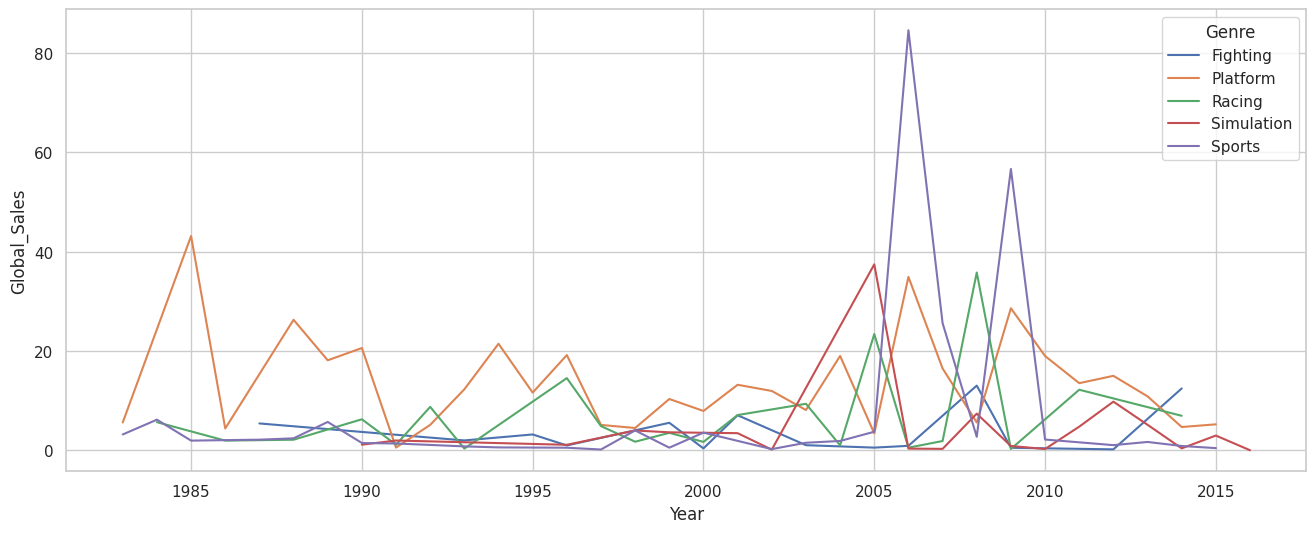

In [132]:
sns.lineplot(data = df, x = 'Year', y = 'Global_Sales', hue = 'Genre')